In [3]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.preprocessing import scale

In [7]:
ventas = pd.read_csv("./dataset/resultadosVentas.csv", decimal=",")
df = ventas.copy()

/var/folders/37/x57w4bp561x9sj71bs9nmw0w0000gn/T/ipykernel_70102/2422259629.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  ventas = pd.read_csv("./dataset/resultadosVentas.csv", decimal=",")


In [8]:
df.head()

,IdCliente,Provincia,Grupo,Ventas 2018,Unidades 2018,Tickets 2018,Antigüedad,Ventas 2017,Unidades 2017,Tickets 2017,Ventas 2016,Unidades 2016,Tickets 2016,Ventas 2015,Unidades 2015,Tickets 2015,Ventas 2014,Unidades 2014,Tickets 2014
0,Cliente 1,29,Tienda/Supermercado de Alimentacion,1525.788,2213.28,46,2009-01-05 09:45:21.000,3292.9751,2307.37,38.0,3545.6107,4569.7,49.0,6306.3445,8004.09,91.0,6439.1802,8519.13,83.0
1,Cliente 2,29,NaN,115.8179,82.97,1,2009-01-03 10:48:33.000,286.9034,145.04,3.0,446.0571,321.39,12.0,135.4624,91.62,4.0,190.4443,175.68,7.0
2,Cliente 3,29,Tienda/Supermercado de Alimentacion,25670.9588,35516.11,236,2009-01-03 09:07:38.000,27947.2056,36381.85,256.0,33964.779,41264.9,257.0,36267.5888,42266.22,338.0,36096.9745,41184.69,348.0
3,Cliente 4,29,Tienda/Supermercado de Alimentacion,39519.3851,42299.2,358,2009-01-05 05:31:46.000,25968.0955,38376.72,231.0,14953.0722,24823.03,170.0,15524.3915,25823.11,248.0,13159.2442,21074.77,175.0
4,Cliente 5,29,Tienda/Supermercado de Alimentacion,2555.5218,2587.39,20,2009-01-12 11:39:56.000,3455.6742,2657.39,24.0,3335.1821,2684.27,31.0,1278.0458,950.49,10.0,1095.3949,563.89,7.0


In [9]:
df.sample(5)

,IdCliente,Provincia,Grupo,Ventas 2018,Unidades 2018,Tickets 2018,Antigüedad,Ventas 2017,Unidades 2017,Tickets 2017,Ventas 2016,Unidades 2016,Tickets 2016,Ventas 2015,Unidades 2015,Tickets 2015,Ventas 2014,Unidades 2014,Tickets 2014
35435,Cliente 35436,41,"Horeca (Bares, Restaurante, Cafet.)",7184.2951,4327.55,46,2012-07-19 08:03:52.000,6218.0933,4261.6,77.0,8253.2677,5640.73,52.0,20521.9785,15758.73,83.0,14895.7,11458.24,49.0
27616,Cliente 27617,41,Tienda/Supermercado de Alimentacion,469.377,422,9,2018-02-24 06:53:15.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17455,Cliente 17456,29,NaN,364.9525,300.52,9,2012-06-01 10:01:37.000,253.9868,139.64,5.0,161.5614,87.22,5.0,NaN,NaN,NaN,NaN,NaN,NaN
25658,Cliente 25659,29,"Horeca (Bares, Restaurante, Cafet.)",2960.7887,3229.98,32,2017-05-23 16:46:01.000,491.188,351.91,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19227,Cliente 19228,0,Distribuidor,7813.8817,8343.72,86,2014-12-26 10:37:35.000,335.63,193,6.0,1958.1414,1132.18,22.0,1826.9146,1752.93,19.0,287.09,306,1.0


In [10]:
df.shape

(38787, 19)

In [11]:
df.columns

Index(['IdCliente', 'Provincia', 'Grupo', 'Ventas 2018', 'Unidades 2018',
       'Tickets 2018', 'Antigüedad', 'Ventas 2017', 'Unidades 2017',
       'Tickets 2017', 'Ventas 2016', 'Unidades 2016', 'Tickets 2016',
       'Ventas 2015', 'Unidades 2015', 'Tickets 2015', 'Ventas 2014',
       'Unidades 2014', 'Tickets 2014'],
      dtype='object')

In [29]:
df.dtypes  #solo se salvan tickets

IdCliente         object
Provincia         object
Grupo             object
Ventas 2018       object
Unidades 2018     object
Tickets 2018       int64
Antigüedad        object
Ventas 2017       object
Unidades 2017     object
Tickets 2017     float64
Ventas 2016       object
Unidades 2016     object
Tickets 2016     float64
Ventas 2015       object
Unidades 2015     object
Tickets 2015     float64
Ventas 2014       object
Unidades 2014     object
Tickets 2014     float64
dtype: object

In [131]:
df['Antigüedad'] = pd.to_datetime(df['Antigüedad'])

In [14]:
#Valores nulos en columnas
df.Provincia.value_counts()

29    10457
14     7787
41     4668
11     3303
23     2696
      ...  
16        1
35        1
20        1
32        1
12        1
Name: Provincia, Length: 82, dtype: int64

In [16]:
df.Grupo.value_counts()

Horeca (Bares, Restaurante, Cafet.)    10246
Tienda/Supermercado de Alimentacion     8195
Otros                                   4802
Particulares                            2355
Distribuidor                            1189
Empleados                                651
Drogueria                                245
Name: Grupo, dtype: int64

In [21]:
df.isna().sum()    #Analizar esto, años se ve q va decreciendo
#vemos q coinciden entre ventas,unidades,tickets

IdCliente            0
Provincia            7
Grupo            11104
Ventas 2018          0
Unidades 2018        0
Tickets 2018         0
Antigüedad           0
Ventas 2017       7165
Unidades 2017     7165
Tickets 2017      7165
Ventas 2016      10701
Unidades 2016    10701
Tickets 2016     10701
Ventas 2015      13962
Unidades 2015    13962
Tickets 2015     13962
Ventas 2014      17109
Unidades 2014    17109
Tickets 2014     17109
dtype: int64

In [33]:
#Convierto solo ventas2018
df['Ventas 2018']= df['Ventas 2018'].astype(float)

In [34]:
df.dtypes

IdCliente         object
Provincia         object
Grupo             object
Ventas 2018      float64
Unidades 2018     object
Tickets 2018       int64
Antigüedad        object
Ventas 2017       object
Unidades 2017     object
Tickets 2017     float64
Ventas 2016       object
Unidades 2016     object
Tickets 2016     float64
Ventas 2015       object
Unidades 2015     object
Tickets 2015     float64
Ventas 2014       object
Unidades 2014     object
Tickets 2014     float64
dtype: object

In [127]:
#Analizar los nan en columna grupo
df.groupby('Grupo')['Ventas 2018'].mean()
#podemos tener alguna idea a q grupo pertenece a partir de las ventas. 
#ML supervisado clasificacion multiclase (7Clases)

Grupo
Distribuidor                           8528.932163
Drogueria                              5026.802040
Empleados                              1457.894711
Horeca (Bares, Restaurante, Cafet.)    6938.108929
Otros                                  3094.912363
Particulares                           1533.133810
Tienda/Supermercado de Alimentacion    9310.509890
Name: Ventas 2018, dtype: float64

In [132]:
df.Antigüedad
 

0       2009-01-05 09:45:21
1       2009-01-03 10:48:33
2       2009-01-03 09:07:38
3       2009-01-05 05:31:46
4       2009-01-12 11:39:56
                ...        
38782   2018-11-21 18:04:14
38783   2018-12-13 17:23:42
38784   2018-12-20 13:23:19
38785   2018-12-28 19:14:02
38786   2018-08-02 10:49:56
Name: Antigüedad, Length: 38787, dtype: datetime64[ns]

In [138]:
#Eliminar hora
df["Antiguedad_sin_hora"] = df['Antigüedad'].dt.date

In [139]:
df.Antiguedad_sin_hora.value_counts()

#Analizar h

2009-01-02    1441
2009-01-05     928
2009-01-03     926
2009-01-07     680
2009-01-08     571
              ... 
2009-11-14       1
2010-04-24       1
2009-09-12       1
2013-05-25       1
2017-06-10       1
Name: Antiguedad_sin_hora, Length: 3007, dtype: int64

In [39]:
####################################################################################
####################################################################################
####################################################################################
####################################################################################
####################################################################################
####################################################################################
####################################################################################
####################################################################################


In [41]:
##################### En sucio clase ###############################

In [103]:
df2018 = ventas[["IdCliente","Provincia","Grupo","Ventas 2018", "Unidades 2018","Tickets 2018"]] 

In [104]:
copia = df2018

In [105]:
#df2018["Grupo"]
vacio = []
for x in df2018["Grupo"]:
    vacio.append(x)
    
aa = set(vacio)
print(aa)
    



{'Particulares', 'Horeca (Bares, Restaurante, Cafet.)', nan, 'Otros', 'Drogueria', 'Tienda/Supermercado de Alimentacion', 'Empleados ', 'Distribuidor'}


In [106]:
import numpy as np

df2018["Grupo"] = df2018["Grupo"].replace("Horeca (Bares, Restaurante, Cafet.)",0 ) \
                    .replace("Empleados ", 1) \
                    .replace("Distribuidor",2 ) \
                    .replace("Drogueria", 3) \
                    .replace("Tienda/Supermercado de Alimentacion", 4 ) \
                    .replace("Otros",5 ) \
                    .replace("Particulares",6 ) \
                    .replace(np.nan, 7) 


/var/folders/37/x57w4bp561x9sj71bs9nmw0w0000gn/T/ipykernel_70102/3985563425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2018["Grupo"] = df2018["Grupo"].replace("Horeca (Bares, Restaurante, Cafet.)",0 ) \


In [107]:
vacio = []
for x in df2018["Grupo"]:
    vacio.append(x)
    
aa = set(vacio)
print(aa)
    

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0}


In [108]:
copia2 = df2018

In [109]:
df2018 = df2018.drop("IdCliente", axis= 1)

In [110]:

df2018["Provincia"] = pd.to_numeric(df2018["Provincia"], errors="coerce")

df2018 = df2018.dropna(subset=["Provincia"])


In [111]:
#df2018["Grupo"]
vacio = []
for x in df2018["Ventas 2018"]:
    vacio.append(x)
    
a2 = set(vacio)
#print(a2)


    

In [112]:
df2018Escalado = scale(df2018)

/Users/rushabhpatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rushabhpatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rushabhpatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rushabhpatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

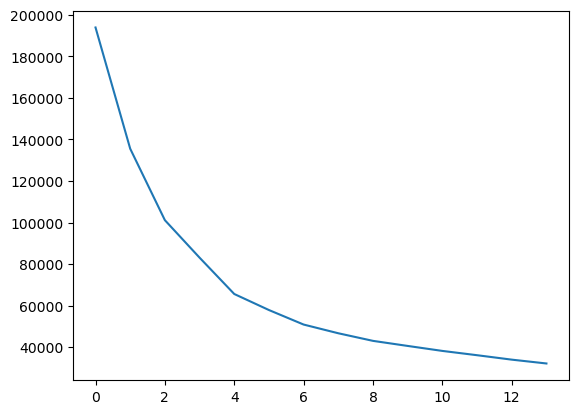

In [113]:
K = range(1,15)
inercia = []
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df2018Escalado)
    inercia.append(kmeanModel.inertia_)
plt.plot(inercia)

In [114]:
km = KMeans(n_clusters = 7)
km.fit(df2018Escalado)

/Users/rushabhpatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=7)

In [115]:
km.labels_

array([0, 0, 5, ..., 4, 4, 4], dtype=int32)

In [116]:
df2018["Ventas 2018"] = df2018["Ventas 2018"].astype("float64")

In [117]:
df2018["cluster"] = km.labels_

In [118]:
df2018

,Provincia,Grupo,Ventas 2018,Unidades 2018,Tickets 2018,cluster
0,29.0,4.0,1525.7880,2213.28,46,0
1,29.0,7.0,115.8179,82.97,1,0
2,29.0,4.0,25670.9588,35516.11,236,5
3,29.0,4.0,39519.3851,42299.2,358,5
4,29.0,4.0,2555.5218,2587.39,20,0
...,...,...,...,...,...,...
38782,4.0,4.0,971.5203,1479.77,12,4
38783,4.0,0.0,52.2100,22,1,6
38784,4.0,7.0,53.5920,50,1,4
38785,18.0,4.0,173.0500,170,1,4


In [119]:
df2018["Ventas 2018"] = df2018["Ventas 2018"].astype("float64")

In [120]:
df2018

,Provincia,Grupo,Ventas 2018,Unidades 2018,Tickets 2018,cluster
0,29.0,4.0,1525.7880,2213.28,46,0
1,29.0,7.0,115.8179,82.97,1,0
2,29.0,4.0,25670.9588,35516.11,236,5
3,29.0,4.0,39519.3851,42299.2,358,5
4,29.0,4.0,2555.5218,2587.39,20,0
...,...,...,...,...,...,...
38782,4.0,4.0,971.5203,1479.77,12,4
38783,4.0,0.0,52.2100,22,1,6
38784,4.0,7.0,53.5920,50,1,4
38785,18.0,4.0,173.0500,170,1,4


In [121]:
df2018[df2018["cluster"] ==1].describe()

,Provincia,Grupo,Ventas 2018,Tickets 2018,cluster
count,150.000000,150.000000,150.000000,150.000000,150.0
mean,22.886667,3.400000,102952.402630,436.686667,1.0
std,8.859482,1.305641,39669.184868,294.182593,0.0
min,4.000000,0.000000,56685.323500,101.000000,1.0
25%,18.000000,4.000000,80263.043125,306.750000,1.0
50%,29.000000,4.000000,90157.966650,394.500000,1.0
75%,29.000000,4.000000,111916.526925,508.250000,1.0
max,41.000000,5.000000,286945.168300,2487.000000,1.0


In [122]:
df2018[df2018["cluster"] ==2].describe()

,Provincia,Grupo,Ventas 2018,Tickets 2018,cluster
count,3532.000000,3532.000000,3532.000000,3532.000000,3532.0
mean,23.247169,2.277463,16373.435203,126.553511,2.0
std,9.706267,2.027570,7396.975173,60.435629,0.0
min,0.000000,0.000000,355.821300,22.000000,2.0
25%,14.000000,0.000000,11367.170575,83.000000,2.0
50%,23.000000,4.000000,15709.199500,114.000000,2.0
75%,29.000000,4.000000,20933.560225,154.000000,2.0
max,41.000000,7.000000,44723.230200,526.000000,2.0


In [123]:
df2018[df2018["cluster"] ==3].describe()

,Provincia,Grupo,Ventas 2018,Tickets 2018,cluster
count,5758.000000,5758.000000,5758.000000,5758.000000,5758.0
mean,31.191560,0.258423,4038.229914,33.544807,3.0
std,6.580453,0.666771,3987.904488,27.266057,0.0
min,23.000000,0.000000,0.000000,1.000000,3.0
25%,29.000000,0.000000,975.845075,12.000000,3.0
50%,29.000000,0.000000,2617.677450,27.000000,3.0
75%,41.000000,0.000000,6078.982150,50.000000,3.0
max,99.000000,3.000000,25077.225700,178.000000,3.0


In [124]:
df2018[df2018["cluster"] ==4].describe()

,Provincia,Grupo,Ventas 2018,Tickets 2018,cluster
count,13210.000000,13210.000000,13210.000000,13210.000000,13210.0
mean,14.573429,5.739970,1572.478955,16.466919,4.0
std,4.596335,1.242429,2164.366905,19.587900,0.0
min,0.000000,3.000000,-184.930200,1.000000,4.0
25%,11.000000,5.000000,184.465425,3.000000,4.0
50%,14.000000,6.000000,729.919650,9.000000,4.0
75%,18.000000,7.000000,2081.756050,23.000000,4.0
max,24.000000,7.000000,20879.801600,169.000000,4.0


In [125]:
####################################################################################
####################################################################################
####################################################################################
####################################################################################
####################################################################################
####################################################################################
####################################################################################
####################################################################################
